#### OVERVIEW

In this notebook, I am going to take you through a series of analysis.
We will answer a few questions and draw some insights on the 2017 StackOverflow survey for developers.

These are the three questions we want to answer in this notebook:

    1. How does the country you leave affect you as a developer?
    2. How does your Gender affect you when it comes to job placements and salaries?
    3. How does the formal eduction impact you as a developper?

In [1]:
# Importing the necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1 : How does the country affects you as a developer?

Is it important to understand the what the implications of being in a certain country are for a developer.

In [2]:
# Find the number of represented countries in the dataset
number_of_countries = len(df['Country'].unique())

print("The dataset has recorded data from developers from "+str(number_of_countries) + " countries ")

The dataset has recorded data from developers from 201 countries 


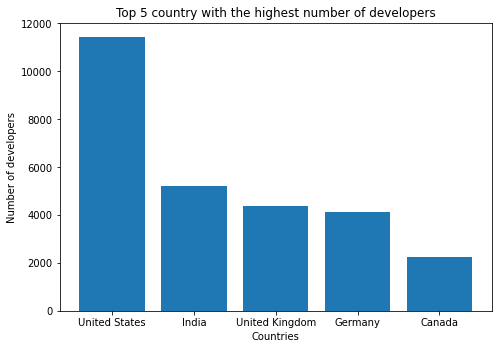

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
British Indian Ocean Territory        1
Turkmenistan                          1
Saint Helena                          1
Guinea                                1
Gabon                                 1
Name: Country, Length: 201, dtype: int64

In [3]:
# Find the count of developers per country
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
countries = ['United States', 'India', 'United Kingdom' , 'Germany', 'Canada']
numbers = df['Country'].value_counts()[:5]
ax.bar(countries,numbers)
plt.title('Top 5 country with the highest number of developers')
plt.xlabel('Countries')
plt.ylabel('Number of developers')


plt.show()
df['Country'].value_counts().sort_values(ascending = False)

The Top 5 countries with the most represented developers are the United States, India, United Kingdom, Germany, Canada. Note that this reflects the reality where those countries are part of the countries with more developers in the world.

In [4]:
# Delete all rows that have nan values in the salary column
# We are dropping these those row because we do not want any biais in the value of the meam.
rm_salary = df.dropna(subset = ['Salary'], how = 'any')

# calculating the average salary per country
rm_salary.groupby(['Country']).mean()['Salary'].sort_values()

Country
Cambodia                          500.0
Cuba                              560.0
Zimbabwe                          700.0
Yemen                            1000.0
Kazakhstan                       1000.0
                                 ...   
Kuwait                         115200.0
Uganda                         120000.0
U.S. Minor Outlying Islands    136000.0
Bermuda                        150000.0
Virgin Islands (USA)           175000.0
Name: Salary, Length: 136, dtype: float64

The countries with the highest average salaries are Kuwait, Uganda, U.S. Minor Outlying Islands, Bermuda and Virgina Islands. This is the average and we might be wrong saying that these countries are the countries that pay best. Countries like the United have around 11k responses and the probability of having outliers that will drop or increase the average is high

In [5]:
print("the average salary in this dataset is : " + str(rm_salary['Salary'].mean()))

the average salary in this dataset is : 56298.48064062925


## Conclusion :
Countries like the United States, Inda etc have more developers, meaning that working as a developer in those countries is most common than other countries.
We also saw that the greater the number of programmers in a country, the greater the average salary.

Last, if you work as a developer, you can expect a salary around $56000

# Question 2 : How does your Gender affects you when it comes to job placements and salaries?


In [6]:
# Check the missing values in the Gender column 
# We will be using the rm_salary dataset

number_null = sum(rm_salary['Gender'].isnull())
print("There are " + str(number_null) + " null values in the Gender column")

There are 1182 null values in the Gender column


In [7]:
# Let's remove the rows the cotains those missing values
new_df = rm_salary.dropna(subset = ['Gender'] , how = 'any')

# Check the missing values after renmoving the missing values
print("There are now " + str(sum(new_df['Gender'].isnull())) + " null values in the Gender column")
new_df['Gender'].shape

There are now 0 null values in the Gender column


(11709,)

In [8]:
# Check the gender balance in the dataset
gender_repartition = new_df['Gender'].value_counts()/new_df.shape[0]
print(gender_repartition)

Male                                                       0.910923
Female                                                     0.069946
Other                                                      0.004185
Male; Other                                                0.003758
Gender non-conforming                                      0.003672
Male; Gender non-conforming                                0.001793
Female; Transgender                                        0.001623
Female; Gender non-conforming                              0.001110
Transgender                                                0.000683
Male; Female; Transgender; Gender non-conforming; Other    0.000512
Male; Female                                               0.000427
Male; Transgender                                          0.000342
Transgender; Gender non-conforming                         0.000342
Female; Transgender; Gender non-conforming                 0.000256
Male; Female; Transgender                       

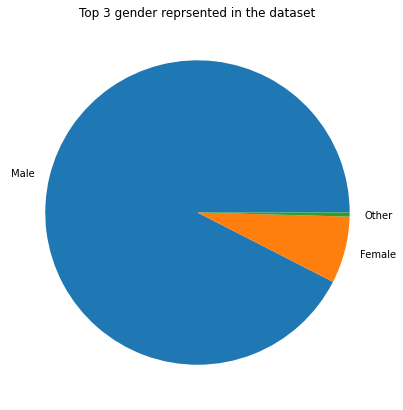

In [11]:
from matplotlib import pyplot as plt 
  
# Creating dataset 
labels = ['Male', 'Female', 'Other']
sizes = new_df['Gender'].value_counts()[:3]
  
    
# Creating plot 
g = plt.figure(figsize =(10, 7)) 
plt.pie(sizes, labels = labels) 
  
# show plot 
plt.title('Top 3 gender reprsented in the dataset')

plt.show() 

### 91% of male, 6% female, and 3% of other genders.

In [12]:
# Let's check the differences in salaries for the genders
new_df.groupby(['Gender']).mean()['Salary'].sort_values()

Gender
Male; Female; Transgender                                   12000.000000
Male; Female; Other                                         15000.000000
Male; Female                                                23867.997408
Male; Female; Transgender; Gender non-conforming; Other     46073.440469
Male; Other                                                 53565.009777
Transgender; Gender non-conforming                          54314.516129
Male                                                        56996.494293
Female                                                      58083.924534
Other                                                       58133.780908
Male; Gender non-conforming                                 60440.697719
Gender non-conforming                                       63672.172798
Male; Gender non-conforming; Other                          66000.000000
Male; Transgender; Other                                    67500.000000
Female; Gender non-conforming               

### Looking at the above result, Male and Female gain almost the same with a slight difference of around plus 2000 for females

# Question 3: How does the formal eduction impact you as a developper?


In [13]:
# Check if there are missing values in the formal education columns
print('There are ' + str(sum(new_df['FormalEducation'].isnull())) + ' missing value in that colunm')

There are 0 missing value in that colunm


In [14]:
# The unique formal education in the dataset
new_df['FormalEducation'].unique()

array(["Bachelor's degree", 'Professional degree', "Master's degree",
       "Some college/university study without earning a bachelor's degree",
       'Doctoral degree', 'Secondary school',
       'I never completed any formal education',
       'Primary/elementary school', 'I prefer not to answer'],
      dtype=object)

Text(0, 0.5, 'Number of developers')

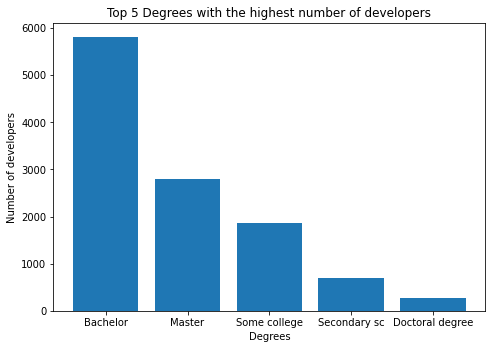

In [18]:
# Find the counts per formal education
new_df['FormalEducation'].value_counts()
# This shows that the formal bachelor's degree is the most commom formal education for developers

# PLot the Top 5 degrees
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Degrees = ['Bachelor','Master', 'Some college', 'Secondary sc' , 'Doctoral degree']
numbers = new_df['FormalEducation'].value_counts()[:5]
ax.bar(Degrees,numbers)
plt.title('Top 5 Degrees with the highest number of developers')
plt.xlabel('Degrees')
plt.ylabel('Number of developers')

In [29]:
# How the formal eduction affects your salary
new_df.groupby(['FormalEducation']).mean()['Salary'].sort_values()

FormalEducation
I prefer not to answer                                               34832.867606
Secondary school                                                     40935.946437
Professional degree                                                  41726.747751
I never completed any formal education                               42699.115515
Some college/university study without earning a bachelor's degree    56819.222632
Bachelor's degree                                                    57976.010760
Master's degree                                                      58763.363327
Primary/elementary school                                            64741.536900
Doctoral degree                                                      78821.555104
Name: Salary, dtype: float64

#### Looking at the above result, we see the more educated you are the greater so salary.There are however exception for primary school and people that never completed a formal education. It's important to notice those any represent 104 datapoints out of 11k, so they might be some biaises